# Introduction

In the telecommunications industry, customers can choose from multiple service providers
and actively switch from one provider to another. Customer “churn” is defined as the
percentage of customers who stopped using a provider’s product or service during a certain
time frame. In this highly competitive market, some telecommunications industries can
experience average annual churn rates as high as 25 percent. Given that it costs 10 times
more to acquire a new customer than to retain an existing one, customer retention has now
become even more important than customer acquisition.
For many providers, retaining highly profitable customers is the number one business goal.
To reduce customer churn, telecommunications companies need to predict which customers
are at high risk of churn.

I will be acting as an analyst on a team of analysts in a popular telecommunications company, which
serves customers in all regions of the United States who has been asked to analyze the
data set to explore the data, identify trends, and compare key metrics.

In [1]:
# Libraries to use

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import random
import warnings
import scipy.stats as stats
%matplotlib inline

## A.  Describe a real-world organizational situation or issue in the Data Dictionary you chose, by doing the following:

### 1. Provide one question that is relevant to your chosen data set. You will answer this question later in the task through an analysis of the cleaned data, using one of the following techniques: chi-square, t-test, or analysis of variance (ANOVA).

Is there a significant difference between churning and non-churning customers in regaards to monthly charge?
H0: There is no difference between churn and monthly charge.
H1: There is a difference between churn and a monthly charge.

The business has rated churn to cost 10x the cost of bringing in new customers. Understanding which features have a statistical relationship to churn can help target specific segments for promotions, improved services or any number of other strategies. While the research question has a focus on monthly charge, all numeric columns will be considered ssince it is computationally simple to loop through.

### 2. Identify all data in your data set that are relevant to answering your question in part A1.

Only the churn and numeric columns will be used for independent two sample t-tests:
        `Children`, `Age`, `Income`, `Outage_sec_perweek`, `Email`, `Contacts`, `Yearly_equip_failure`,
        `Tenure`, `MonthlyCharge`, `Bandwidth_GB_Year`, `Timeliness`, `Fixes`,
        `Replacements`, `Reliability`, `Options`, `Respectfulness`, `Courteous`, `Listening`

## B.  Describe the data analysis by doing the following:

### 1. Using one of the following techniques, write code (in either Python or R) to run the analysis of the data set:

In [2]:
# Read in clean dataset

df = pd.read_csv('churn_clean.csv')

# test read

df.shape

(10000, 50)

In [3]:
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,149.948316,271.493436,4,4,4,3,4,4,4,5


In [4]:
df.describe()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,49153.319600,38.757567,-90.782536,9756.562400,2.0877,53.078400,39806.926771,10.001848,12.016000,...,172.624816,3392.341550,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,2886.89568,27532.196108,5.437389,15.156142,14432.698671,2.1472,20.698882,28199.916702,2.976019,3.025898,...,42.943094,2185.294852,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,1.00000,601.000000,17.966120,-171.688150,0.000000,0.0000,18.000000,348.670000,0.099747,1.000000,...,79.978860,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,26292.500000,35.341828,-97.082812,738.000000,0.0000,35.000000,19224.717500,8.018214,10.000000,...,139.979239,1236.470827,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,48869.500000,39.395800,-87.918800,2910.500000,1.0000,53.000000,33170.605000,10.018560,12.000000,...,167.484700,3279.536903,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,7500.25000,71866.500000,42.106908,-80.088745,13168.000000,3.0000,71.000000,53246.170000,11.969485,14.000000,...,200.734725,5586.141370,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.640660,-65.667850,111850.000000,10.0000,89.000000,258900.700000,21.207230,23.000000,...,290.160419,7158.981530,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


df.describe()
## Additional Cleaning

While the data has been marked clean, there are a few things when loading in this CSV that was may wish to change:

1. Zip/Lat/Lng should be made strings as they are identifiers
2. Rename survey items for easier visual assessment

In [5]:
# set labels to strings
to_string = ['Zip', 'Lat', 'Lng']

df[to_string] = df[to_string].astype(str)

In [6]:
# test
#should return 3 Objects as Pandas strings are objects
for col in to_string:
    print(df[col].dtype)

object
object
object


In [7]:
# rename survey columns
df.rename(columns = {'Item1':'Timeliness',
                     'Item2':'Fixes',
                     'Item3':'Replacements',
                     'Item4':'Reliability',
                     'Item5':'Options',
                     'Item6':'Respectfulness',
                     'Item7':'Courteous',
                     'Item8':'Listening'},
          inplace=True)

In [8]:
# Unit test
df.columns

Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'Marital', 'Gender', 'Churn',
       'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure',
       'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService',
       'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'PaymentMethod', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year', 'Timeliness', 'Fixes', 'Replacements',
       'Reliability', 'Options', 'Respectfulness', 'Courteous', 'Listening'],
      dtype='object')

### 2. Provide the output and the results of any calculations from the analysis you performed.

In [9]:
# Numeric columns
cols = ['Population', 'Children', 'Age', 'Income',
        'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure',
        'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'Timeliness', 'Fixes',
        'Replacements', 'Reliability', 'Options', 'Respectfulness', 'Courteous',
        'Listening']

# Since `Churn` is a binary column, we can set a simple condition for testing
cond = df['Churn'] == 'Yes'

# This subsets the dataframe into the 2 samples
Churn = df.loc[cond, cols]
NoChurn = df.loc[~cond, cols]

#This list will collect rejected null

reject_null = []
# The unequal parameter is invalid so I'm leaving it out
t, p = stats.ttest_ind(Churn, NoChurn)
for i, col in enumerate(cols):
    print(f'\t{col}: t = {t[i]:.5f}, with p-value = {p[i]:.5f}')
    if p[i] <= 0.05:
        reject_null.append(col)

	Population: t = -0.85328, with p-value = 0.39352
	Children: t = -0.42636, with p-value = 0.66985
	Age: t = 0.56291, with p-value = 0.57351
	Income: t = 0.59369, with p-value = 0.55273
	Outage_sec_perweek: t = -0.01564, with p-value = 0.98752
	Email: t = 1.23259, with p-value = 0.21776
	Contacts: t = 0.85662, with p-value = 0.39167
	Yearly_equip_failure: t = -1.59276, with p-value = 0.11125
	Tenure: t = -55.52487, with p-value = 0.00000
	MonthlyCharge: t = 40.18948, with p-value = 0.00000
	Bandwidth_GB_Year: t = -49.22372, with p-value = 0.00000
	Timeliness: t = -0.73402, with p-value = 0.46295
	Fixes: t = -1.32533, with p-value = 0.18509
	Replacements: t = -1.11423, with p-value = 0.26521
	Reliability: t = -0.33959, with p-value = 0.73417
	Options: t = -1.39708, with p-value = 0.16242
	Respectfulness: t = 0.11300, with p-value = 0.91003
	Courteous: t = -0.88507, with p-value = 0.37614
	Listening: t = 0.56522, with p-value = 0.57194


In [10]:
print(f'In a t-test with an alpha = 0.05, {reject_null} showed a rejection of the Null Hypothesis.'
      f' There is a relationship between these variables and churn and so further analysis should be performed.')

In a t-test with an alpha = 0.05, ['Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year'] showed a rejection of the Null Hypothesis. There is a relationship between these variables and churn and so further analysis should be performed.


Below you will see a string of histograms for the features selected above. The yellow plot shows the full distribution of the labeled feature, blue is customers not churning and red are customers who are churning. This last chart overlays Churns vs No Churn.

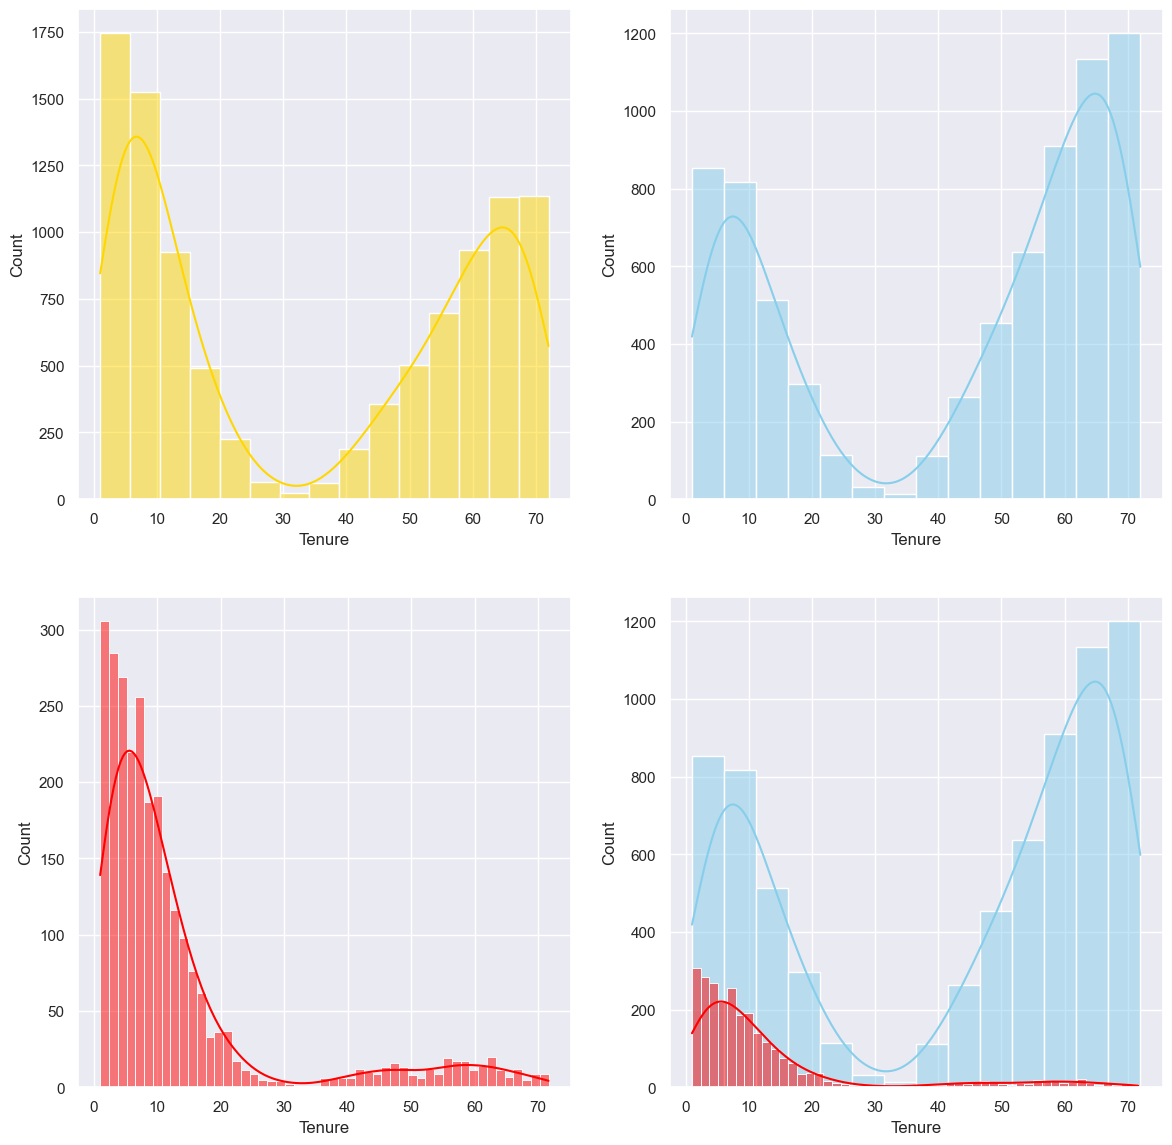

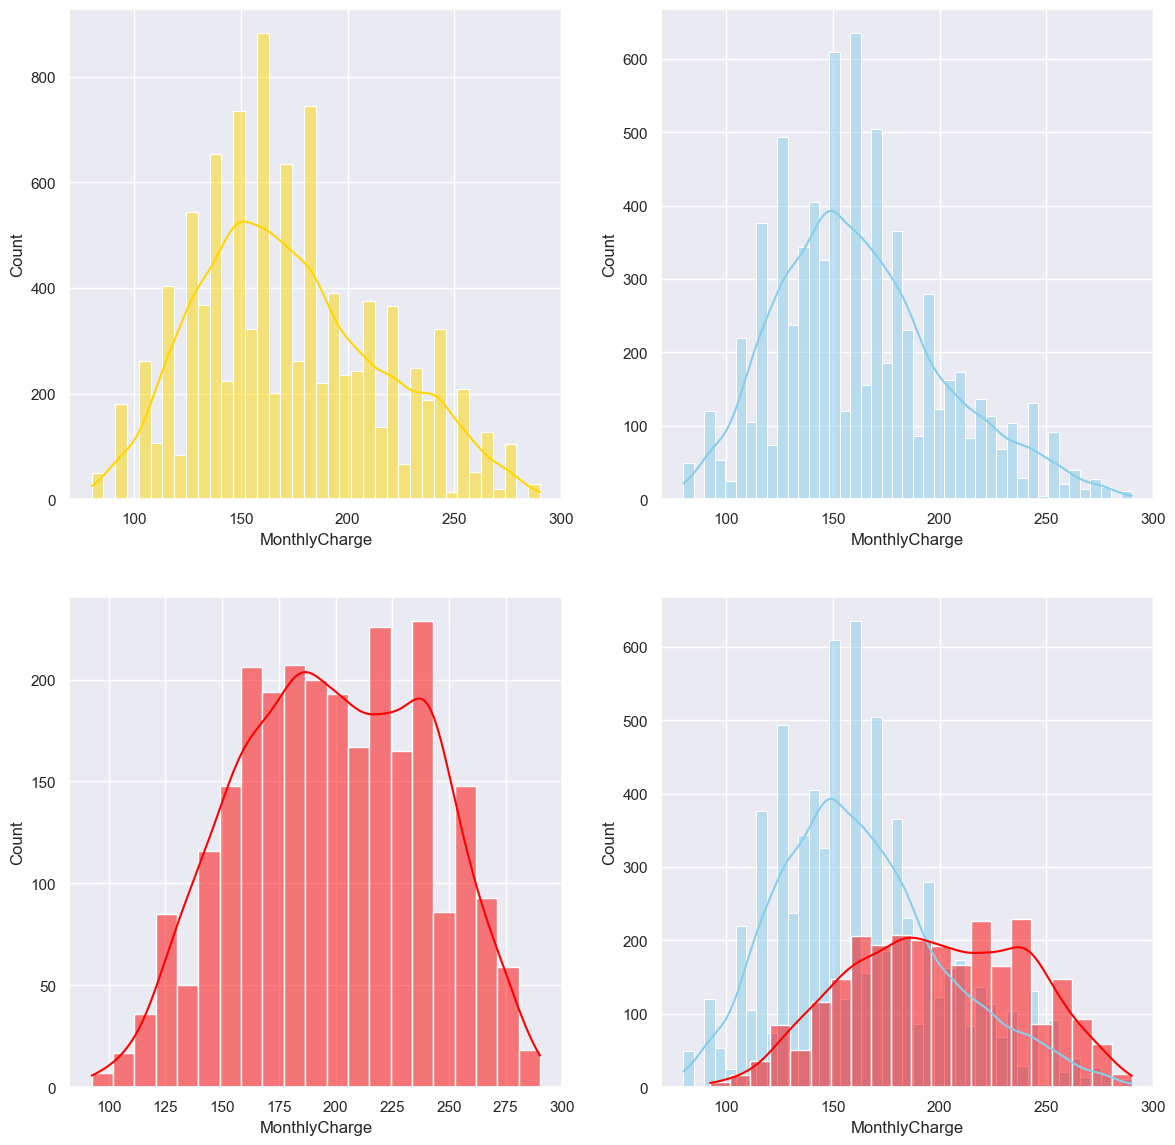

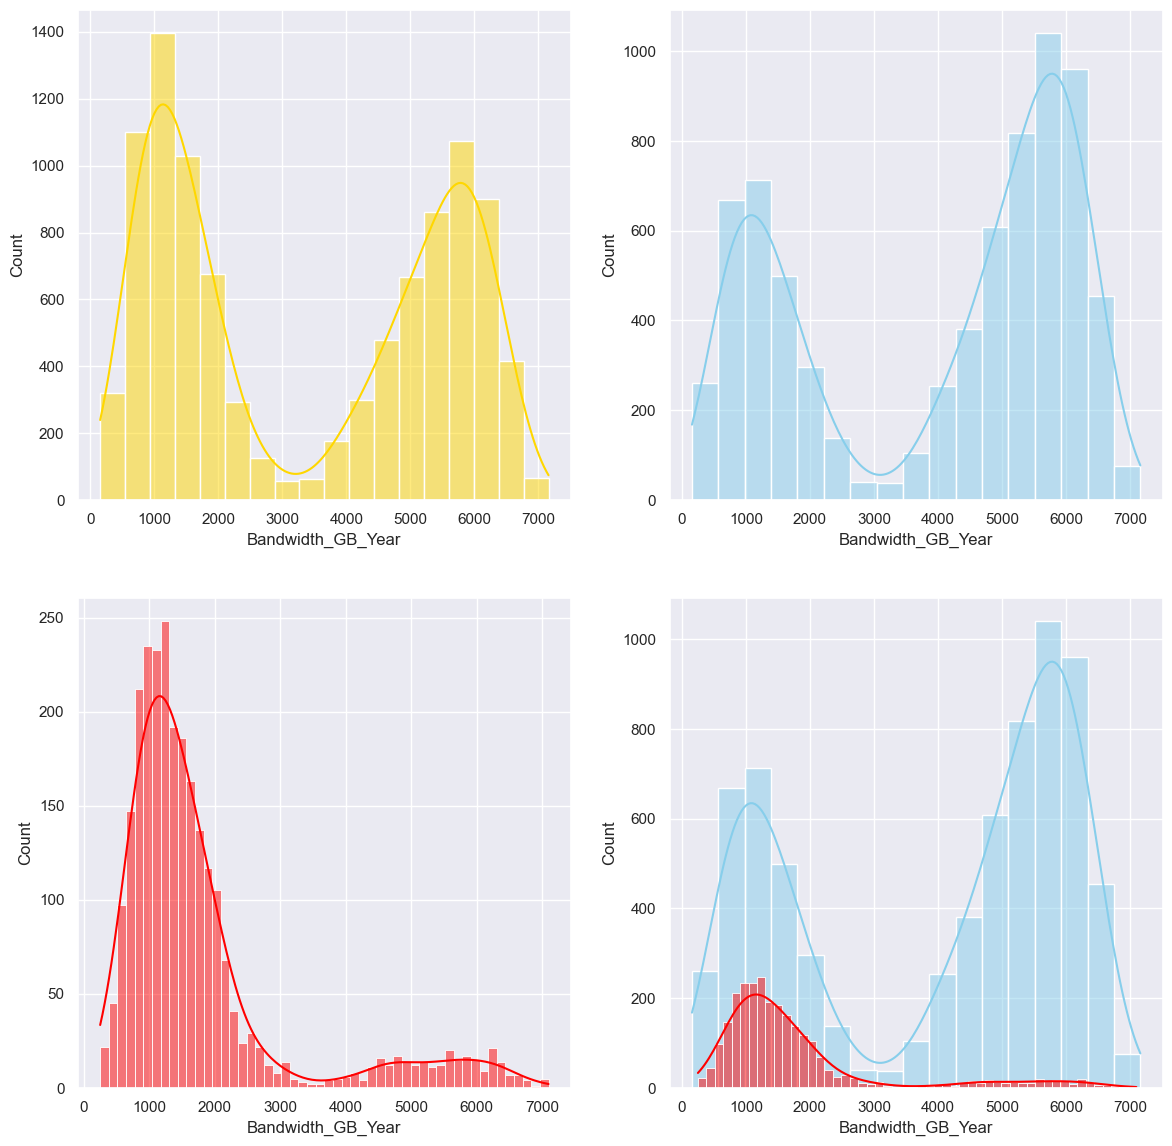

In [11]:
sns.set(style="darkgrid")
for col in reject_null:
    fig, axs = plt.subplots(2, 2, figsize=(14, 14))

    sns.histplot(data=df[col], kde=True, color='Gold', ax=axs[0,0])



    sns.histplot(data=df[col][~cond], kde=True, color = 'skyblue', ax=axs[1,1])



    sns.histplot(data=df[col][cond], kde=True, color= 'red', ax=axs[1,0])



    sns.histplot(data=df[col][~cond], kde=True, color = 'skyblue', ax=axs[0,1])
    sns.histplot(data=df[col][cond], kde=True, color= 'red')


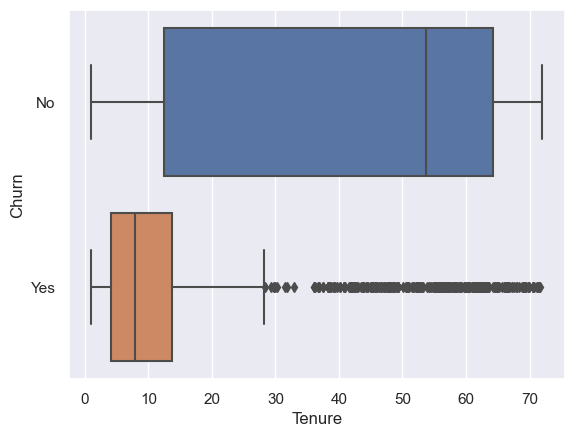

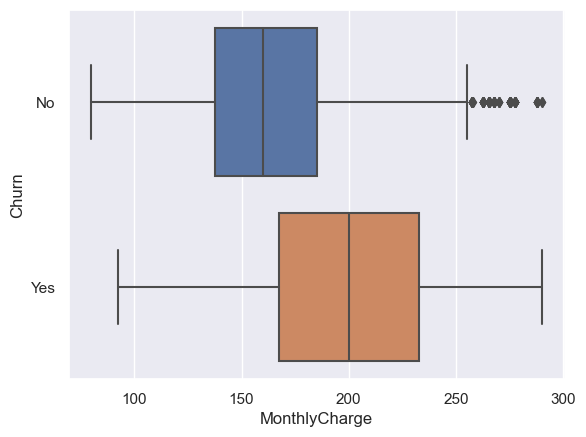

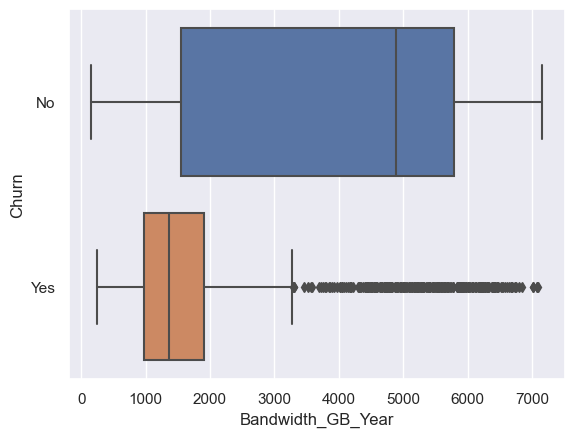

In [12]:
for col in reject_null:
    ax = sns.boxplot(y='Churn',
                     x=col,
                     data=df)
    plt.show()

From the visualization, the distributions for churn vs. no churn do appear different for the selected variables.

`Monthly_Charge`, the primary feature, has a normal distribution with most of the churners have higher billing rates. There are a few outliers in the no churn with extremely high billing that skews this further. It is safe to say that those paying less is related to reducing churn. Other feature considerations are reported below.

For `Tenure`, there is a Bimodal distribution showing customers that are more recent and longer term. Customers seem to be more likely to churn the shorter term they have been with the company. Many outliers in Churn V Tenure also skew the data further right than most use cases. Retention seems to naturally edify retention.

`Bandwidth_Gb_Year` is bimodal overall but those churning follow a normal distribution. Most churners have a lower bandwidth usage with many outliers shifting the median right as well as many users being adjusted to their 1-year data usage from current trend. Those that are churning are using less data showing that the service is less important for them.

### 3. Justify why you chose this analysis technique.

Python is the most used langauge for scientific computing and has a multitude of packages to allow statistical tests from Sklearn, scipy and stats. It also has Matplotlib and Seaborn extensions for easy visualization.

With the number of observations in the data, a T-Test is the most appropriate hypothesis test. Since features are being compared to Churn or ~Churn, the two sample independent variant will be used (AnalyticsVidhya, 2019). Though the data may not conform to normal distribution, large sample sizes (N>50) can be used for independent T-Tests and be accurate (Glen, 2022).

With the business goal of reducing churn, a single analysis would yield limited insight. A simple loop method ensures all features were considered. This preps the data for ANOVA testing or ML in the future.

## C.  Identify the distribution of two continuous variables and two categorical variables using univariate statistics from your cleaned and prepared data.



In [13]:
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,Timeliness,Fixes,Replacements,Reliability,Options,Respectfulness,Courteous,Listening
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.251,-133.37571,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.2408,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,149.948316,271.493436,4,4,4,3,4,4,4,5


### Continuos Variables

The continuous variables, `Age` and `Outage_sec_perweek` are charted below.

<Axes: xlabel='Age', ylabel='Count'>

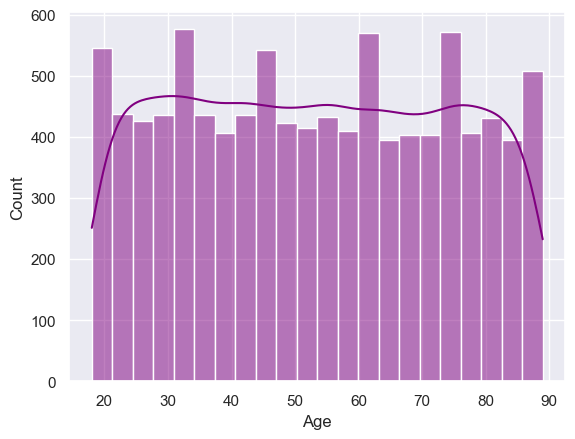

In [14]:
sns.histplot(data=df['Age'], kde=True, color='purple')

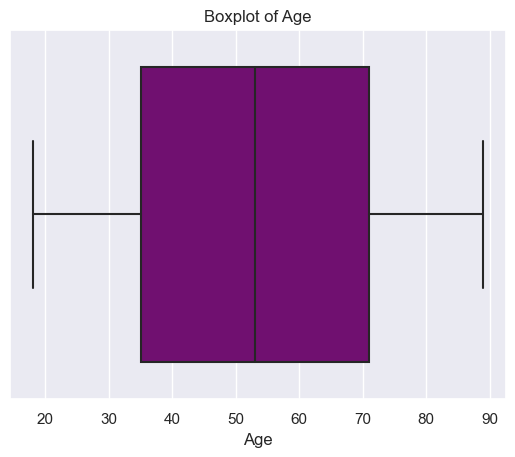

In [15]:
sns.boxplot(x=df['Age'], color='purple')
plt.title('Boxplot of Age')
plt.xlabel('Age')
plt.show()

Age has an even distribution with some spikes. This distribution tells us that any age in our dataset is just as likely as any other. Age has a large standard deviation of ~20 years.
The initial spike in the 20 range comes from new customers who can sign up for services themselves once becoming an adult.

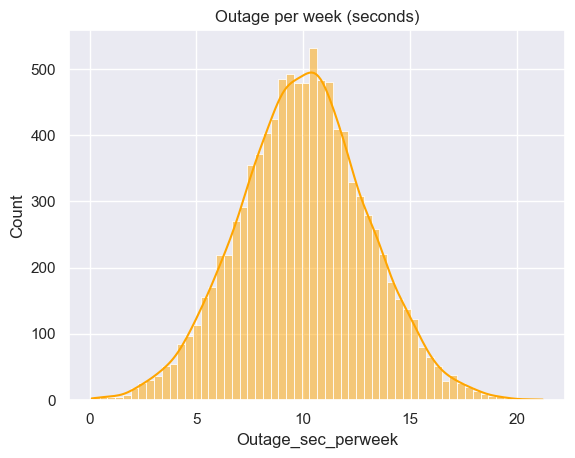

In [16]:
sns.histplot(data=df['Outage_sec_perweek'], kde=True, color='orange')
plt.title('Outage per week (seconds)')
plt.show()


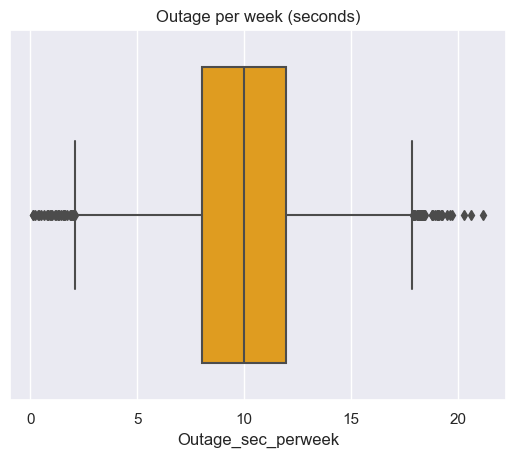

In [17]:
sns.boxplot(x=df['Outage_sec_perweek'], color='orange')
plt.title('Outage per week (seconds)')
plt.show()

Outages follow a normal distribution. Most customers will experience an outage between 7 and 13 seconds

### Categorical

Below, Gender and Marital Status will be explored.

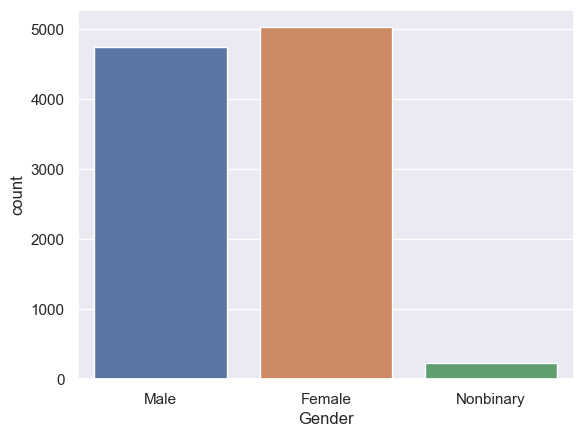

In [18]:
sns.countplot(x=df['Gender'])
plt.show()

Most customers are either male or female.

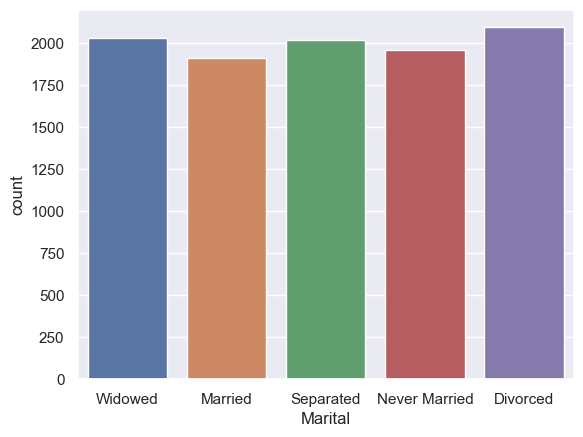

In [19]:
sns.countplot(x=df['Marital'])
plt.show()

All categories under marital are nearly evenly represented.

## D.  Identify the distribution of two continuous variables and two categorical variables using bivariate statistics from your cleaned and prepared data.

### Continuous

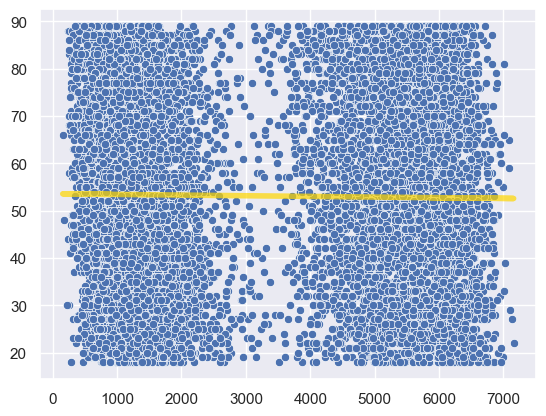

In [20]:
# create a bar graph with line of best fit
x = np.array(df['Bandwidth_GB_Year'])
y = np.array(df['Age'])
m, b = np.polyfit(x, y, 1)
sns.scatterplot(data=df, y=y, x=x)
# add a line of best fit to bar
plt.plot(x, m*x + b, color='gold', lw=4, alpha=.7)
plt.show()

In [21]:
# Checking the Pearson Coefficient for mathematical interpretation after visual assessment
rho = np.corrcoef(x, y)
print(rho[0][1])

-0.0147236477573449


From the distribution above, there is not a trend between age and bandwidth usage. This could be because of multiple users in the home.

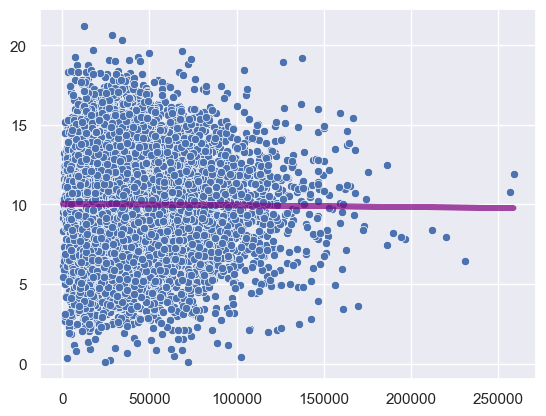

In [22]:
# create a bar graph with line of best fit
x = np.array(df['Income'])
y = np.array(df['Outage_sec_perweek'])
m, b = np.polyfit(x, y, 1)
sns.scatterplot(data=df, y=y, x=x)
# add a line of best fit to bar
plt.plot(x, m*x + b, color='purple', lw=4, alpha=.7)
plt.show()

In [23]:
print(rho[0][1])

-0.0147236477573449


Based on the Pearson Coefficient, there is no relationship between Income and Outages. A further analysis by location heatmap could help target areas more affected tha others.

### Categorical Data

#### Multiple Products to Churn



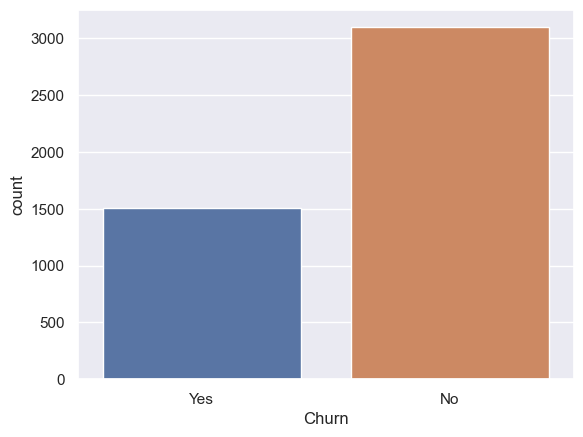

In [24]:
sns.countplot(data=df, x=df.loc[df['Multiple'] == 'Yes', 'Churn'])
plt.show()

There is a staggering number of customers with multiple products that are churning. This may be an issue to packages, price or other factor. While the overall amount is 15% of the dataset, churning customers represent cascading loss of revenue in if churn is a loss of all business services with the firm.


#### Monthly Charge to Techie

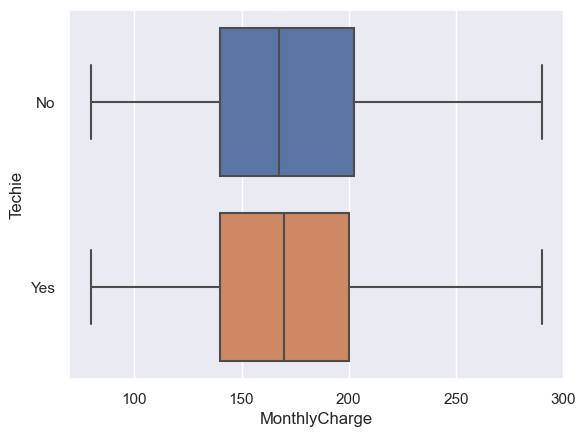

In [25]:
sns.boxplot(data=df, x='MonthlyCharge', y='Techie')
plt.show()

From the above, Techies are paying roughly the same amount for services as the rest of customers.

## E.  Summarize the implications of your data analysis by doing the following:

1. Discuss the results of the hypothesis test.

    The T-Tests performed suggested a relationship between `Churn` and the following features: `Tenure`, `Bandwidth_Gb_year`, and `MonthlyCharge`. Each of these features had a P-Value smaller than the alpha of 0.5. If we reduced our alpha to 0.1 all these features still show significance. Due to this, the null hypothesis is rejected. The histograms and box plots showed for each feature in relation to churn show visually the mean was different in each feature or that the churning customers had a different distribution type entirely.

2. Discuss the limitations of your data analysis.

    The customer data is a selected sample that can only be used to make predictions about the firm's customer base and not the general population. There is limited information about churn, such as a churn reason, to help address any customer identified issues. The T-Test, while showing significance, can't tell us why there is a relationship between churn and the features explored. There is no information on competitor firms and no location heatmap analysis was done to target geographic areas of concern.

3. Recommend a course of action based on your results.

    Given the current information, I would say short term to fight churn, looking at bundling services to see if cost can be lowered can assist as well as a loyalty program to incentivize tenure. A study at Indiana University states the bundling telecom services with reduced cost does have a positive effect on retention (Prince & Greenstein, 2011).

    For longer term, further analysis is needed such as beginning to collect customre responses on churn reason, comparing competitor service services and comparing customer sets to general population segments. I also recommend doing a heatmap analysis of churn to find target areas for piloting any programs.

### Reference the web sources used to acquire segments of third-party code to support the analysis.

#### <b><center> References </b></center>

<div style=“text-indent: -36px; padding-left: 36px;”>

<p>AnalyticsVidhya. (2019, May 16). Statistics 101 | Types Of T Tests. Analytics Vidhya. Retrieved July 3, 2022, from https://www.analyticsvidhya.com/blog/2019/05/statistics-t-test-introduction-r-implementation/</p>

<p>Glen, S. (n.d.). Non Normal Distribution. Statistics How To. Retrieved July 3, 2022, from https://www.statisticshowto.com/probability-and-statistics/non-normal-distributions/</p>

<p>Prince, J., & Greenstein, S. (2011, November). Does Service Bundling Reduce Churn?Kelley School of Business. Retrieved July 3, 2022, from https://host.kelley.iu.edu/riharbau/RePEc/iuk/wpaper/bepp2011-05-prince-greenstein.pdf</p>





